In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, optimizers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from skimage import exposure
from imgaug import augmenters as iaa
import seaborn as sns
import cv2 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
data_path = "D:\Prodigy\proj4\leapGestRecog"

In [3]:
os.listdir(data_path)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']

In [4]:
def load_data(path):
    images = []
    labels = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            for image in os.listdir(file_path):
                image_path = os.path.join(file_path, image)
                img = cv2.imread(image_path)
                if img is not None:
                    img = cv2.resize(img, (180, 180))
                    images.append(img)
                    labels.append(folder)
    return np.array(images), np.array(labels)

In [5]:
X,y = load_data(data_path)

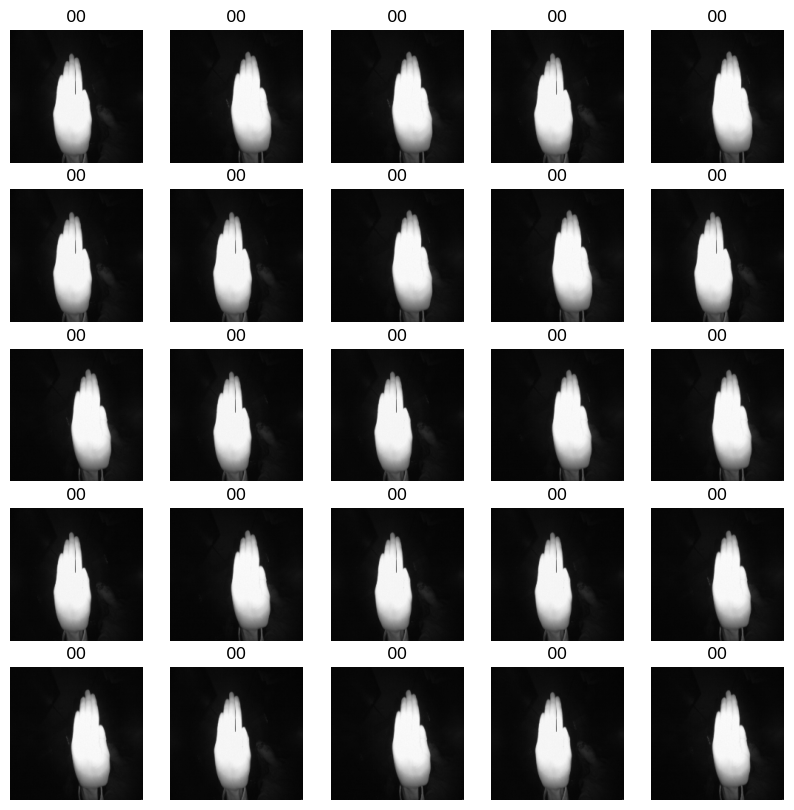

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X[i+50])
  plt.title(y[i+50])
  plt.axis('off')

plt.show()

In [7]:
# Normaliazation
X = X/255 

y

le = LabelEncoder()
y = le.fit_transform(y)
y

y = to_categorical(y)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=40,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [11]:
base_model = applications.ResNet50(weights=None, include_top=False, input_shape=(180, 180, 3))
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 186, 186,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 90, 90,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 90, 90,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 90, 90,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 92, 92,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 45, 45,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 45, 45,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 45, 45,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 45, 45,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 45, 45,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 45, 45,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 45, 45,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 45, 45,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 45, 45,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 45, 45,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 45, 45,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [12]:
model = models.Sequential()
model.add(base_model)

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2502s 5s/step - accuracy: 0.1444 - loss: 2.5105 - val_accuracy: 0.2377 - val_loss: 2.0563
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2698s 5s/step - accuracy: 0.2427 - loss: 2.0497 - val_accuracy: 0.4140 - val_loss: 1.8128
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2599s 5s/step - accuracy: 0.3515 - loss: 1.8195 - val_accuracy: 0.6815 - val_loss: 1.3151
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2492s 5s/step - accuracy: 0.5430 - loss: 1.3910 - val_accuracy: 0.8675 - val_loss: 0.6990
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2510s 5s/step - accuracy: 0.7494 - loss: 0.8445 - val_accuracy: 0.9590 - val_loss: 0.2732
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2602s 5s/step - accuracy: 0.8841 - loss: 0.4504 - val_accuracy: 0.9865 - val_loss: 0.0886
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3297s 7s/step - accuracy: 0.9412 - loss: 0.2428 - val_accuracy: 0.9900 - val_loss: 0.0458
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6454s 13s/step - accuracy: 0.9627 - loss: 0.1560 -

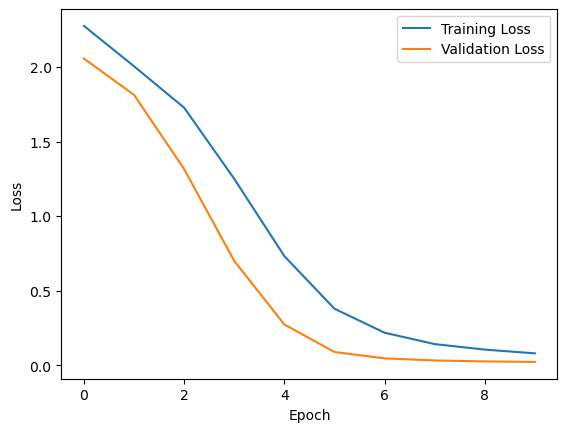

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

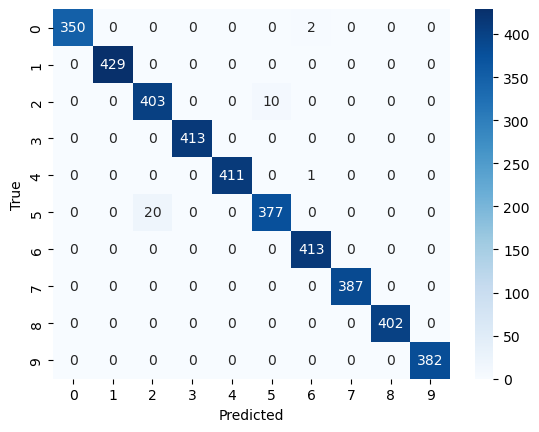

In [18]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Recall: 0.99175
Precision: 0.9918090124803348
F1 Score: 0.9917475177493061
